In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import re
import io
import sys

In [1]:
!pip3 install -U google-generativeai

In [2]:
import google.generativeai as genai
model = genai.GenerativeModel("gemini-1.5-flash")

In [3]:
def extract_code(generated_code):
    code_match = re.search(r"```(?:python)?\n(.*?)```", generated_code, re.DOTALL)
    if code_match:
        return code_match.group(1).strip()
    return generated_code

In [67]:
csv_data = "data.csv"

prompt = f"""
You are provided with the {csv_data}

Write Python code using pandas and matplotlib to perform the following:
1. Calculate the total revenue and expenses for the year.
2. Generate a bar chart that compares revenue and expenses for each month.

The data is in the following format:
Month,Revenue,Expenses
"""

response = model.generate_content(prompt)
generated_code = response.text
response

response:
GenerateContentResponse(
    done=True,
    iterator=None,
    result=protos.GenerateContentResponse({
      "candidates": [
        {
          "content": {
            "parts": [
              {
                "text": "```python\nimport pandas as pd\nimport matplotlib.pyplot as plt\n\n# Load the data from the CSV file\ndf = pd.read_csv(\"data.csv\")\n\n# Calculate the total revenue and expenses\ntotal_revenue = df[\"Revenue\"].sum()\ntotal_expenses = df[\"Expenses\"].sum()\n\n# Print the total revenue and expenses\nprint(f\"Total Revenue: {total_revenue}\")\nprint(f\"Total Expenses: {total_expenses}\")\n\n# Create a bar chart comparing revenue and expenses for each month\ndf.plot(x=\"Month\", y=[\"Revenue\", \"Expenses\"], kind=\"bar\")\nplt.title(\"Monthly Revenue and Expenses\")\nplt.xlabel(\"Month\")\nplt.ylabel(\"Amount\")\nplt.show()\n```\n\n**Explanation:**\n\n1. **Import necessary libraries:**\n   - `pandas` for data manipulation.\n   - `matplotlib.pyplot` for creat

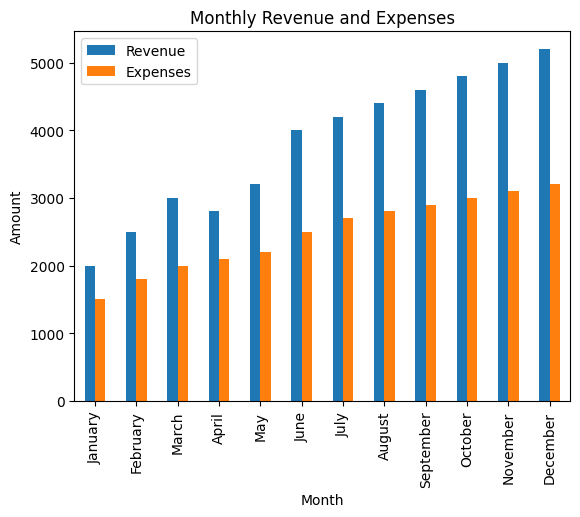

In [69]:
extracted_code = extract_code(generated_code)

# Prepare environment to execute the code safely
local_env = {
    'pd': pd,
    'plt': plt,
    '__builtins__': __builtins__
}

# Create a buffer to capture the print output
output_buffer = io.StringIO()

# Redirect stdout to capture any print output
sys.stdout = output_buffer

try:
    exec(extracted_code, local_env)
    print("Execution Successful")
except Exception as e:
    print(f"Error during code execution: {e}")

# Restore stdout to its original state
sys.stdout = sys.__stdout__

In [74]:
execution_output = output_buffer.getvalue()
execution_output

'Total Revenue: 45700\nTotal Expenses: 29800\nExecution Successful\n'

In [34]:
import matplotlib.pyplot as plt
import io
import os
import sys
import traceback
import re  # For code extraction from LLM response
import html  # For HTML escaping and decoding

# Directory to store output images
output_dir = "static/images"
os.makedirs(output_dir, exist_ok=True)

def extract_code(generated_code):
    code_match = re.search(r"```(?:python)?\n(.*?)```", generated_code, re.DOTALL)
    if code_match:
        extracted_code = code_match.group(1).strip()
    else:
        extracted_code = generated_code

    # Decode HTML entities like &#x27; to their corresponding characters
    return html.unescape(extracted_code)

def execute_code(generated_code):
    output_image_path = None
    plt_file = os.path.join(output_dir, "output.png")
    execution_result = None

    # Create a buffer to capture print output
    output_buffer = io.StringIO()

    try:
        # Redirect stdout to capture print statements
        sys.stdout = output_buffer

        # Prepare the environment for executing the code safely
        local_env = {
            "plt": plt,  # Allow use of matplotlib.pyplot for plotting
            "__builtins__": __builtins__,  # Built-in functions
        }

        # Execute the extracted code safely
        exec(generated_code, local_env)

        # Capture any printed output
        execution_result = output_buffer.getvalue()

        # Check if a figure was generated and save it
        if plt.get_fignums():
            plt.savefig(plt_file)
            plt.close()
            output_image_path = plt_file
        else:
            if not execution_result:
                execution_result = "Code executed successfully, but no output generated."

    except Exception as e:
        execution_result = f"Error executing the code:\n{traceback.format_exc()}"

    finally:
        sys.stdout = sys.__stdout__

    return execution_result, output_image_path

In [4]:
response = model.generate_content("Python program to make a pie chart, use random data")
print(response.text)

KeyboardInterrupt: 

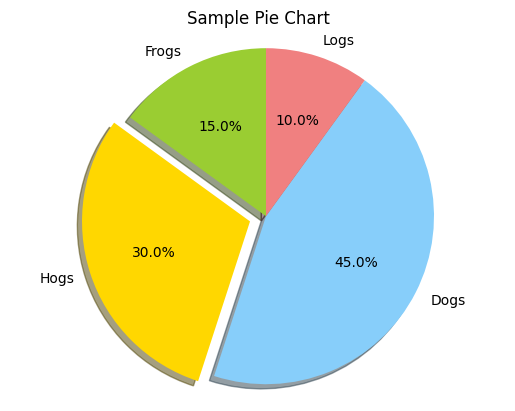

In [6]:
import matplotlib.pyplot as plt

# Sample data
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

# Create the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal') 

# Add title
plt.title("Sample Pie Chart")

# Display the chart
plt.show()